The following simulation ids are missing:
   [11]
Processing 1980-01-16 12:00:00
Processing 1980-02-15 12:00:00
Processing 1980-03-16 12:00:00
Processing 1980-04-16 00:00:00
Processing 1980-05-16 12:00:00
Processing 1980-06-16 00:00:00
Processing 1980-07-16 12:00:00
Processing 1980-08-16 12:00:00
Processing 1980-09-16 00:00:00
Processing 1980-10-16 12:00:00
Processing 1980-11-16 00:00:00
Processing 1980-12-16 12:00:00
Processing 1981-01-16 12:00:00
Processing 1981-02-15 00:00:00
Processing 1981-03-16 12:00:00
Processing 1981-04-16 00:00:00
Processing 1981-05-16 12:00:00
Processing 1981-06-16 00:00:00
Processing 1981-07-16 12:00:00
Processing 1981-08-16 12:00:00
Processing 1981-09-16 00:00:00
Processing 1981-10-16 12:00:00
Processing 1981-11-16 00:00:00
Processing 1981-12-16 12:00:00
Processing 1982-01-16 12:00:00
Processing 1982-02-15 00:00:00
Processing 1982-03-16 12:00:00
Processing 1982-04-16 00:00:00
Processing 1982-05-16 12:00:00
Processing 1982-06-16 00:00:00
Processing 1982-07-1

Processing 2006-09-16 00:00:00
Processing 2006-10-16 12:00:00
Processing 2006-11-16 00:00:00
Processing 2006-12-16 12:00:00
Processing 2007-01-16 12:00:00
Processing 2007-02-15 00:00:00
Processing 2007-03-16 12:00:00
Processing 2007-04-16 00:00:00
Processing 2007-05-16 12:00:00
Processing 2007-06-16 00:00:00
Processing 2007-07-16 12:00:00
Processing 2007-08-16 12:00:00
Processing 2007-09-16 00:00:00
Processing 2007-10-16 12:00:00
Processing 2007-11-16 00:00:00
Processing 2007-12-16 12:00:00
Processing 2008-01-16 12:00:00
Processing 2008-02-15 12:00:00
Processing 2008-03-16 12:00:00
Processing 2008-04-16 00:00:00
Processing 2008-05-16 12:00:00
Processing 2008-06-16 00:00:00
Processing 2008-07-16 12:00:00
Processing 2008-08-16 12:00:00
Processing 2008-09-16 00:00:00
Processing 2008-10-16 12:00:00
Processing 2008-11-16 00:00:00
Processing 2008-12-16 12:00:00
Processing 2009-01-16 12:00:00
Processing 2009-02-15 00:00:00
Processing 2009-03-16 12:00:00
Processing 2009-04-16 00:00:00
Processi

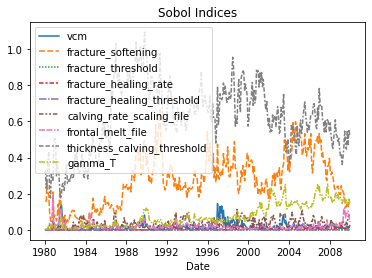

In [567]:
 run ../util/analyze_sobol.py --ensemble_file ../historical/2021_12_all/uq/jib_all.csv ../historical/2021_12_all/csv/fldsum_ts.csv

M6
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_52_1980-1-1_2010-1-1.nc 11152.8916015625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_4_1980-1-1_2010-1-1.nc 0.0
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_13_1980-1-1_2010-1-1.nc 3210.270751953125
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_1_1980-1-1_2010-1-1.nc 0.0
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_57_1980-1-1_2010-1-1.nc 13296.6044921875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_16_1980-1-1_2010-1-1.nc 3238.801513671875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_60_1980-1-1_2010-1-1.nc 4490.69091796875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_19_1980-1-1_2010-1-1.nc 3189.503662109375
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_58_1980-1-1_2010-1-1.nc 4490.69091796

../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_23_1980-1-1_2010-1-1.nc 3587.69677734375
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_43_1980-1-1_2010-1-1.nc 15672.408203125
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_46_1980-1-1_2010-1-1.nc 2470.6279296875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_82_1980-1-1_2010-1-1.nc 2702.444580078125
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_71_1980-1-1_2010-1-1.nc 15695.2353515625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_49_1980-1-1_2010-1-1.nc 3195.064697265625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_30_1980-1-1_2010-1-1.nc 11539.681640625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_87_1980-1-1_2010-1-1.nc 5698.7431640625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_74_1980-1-1_2010-

../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_7_1980-1-1_2010-1-1.nc 19001.62890625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_10_1980-1-1_2010-1-1.nc 11331.6669921875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_69_1980-1-1_2010-1-1.nc 10162.220703125
M17
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_52_1980-1-1_2010-1-1.nc 6388.40576171875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_4_1980-1-1_2010-1-1.nc 10186.333984375
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_13_1980-1-1_2010-1-1.nc 2163.48193359375
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_1_1980-1-1_2010-1-1.nc 9914.83203125
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_57_1980-1-1_2010-1-1.nc 5631.607421875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_16_1980-1-1_2010-1-1.nc

M20
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_52_1980-1-1_2010-1-1.nc 3408.161376953125
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_4_1980-1-1_2010-1-1.nc 5289.66455078125
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_13_1980-1-1_2010-1-1.nc 1453.893310546875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_1_1980-1-1_2010-1-1.nc 5211.1181640625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_57_1980-1-1_2010-1-1.nc 3083.750732421875
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_16_1980-1-1_2010-1-1.nc 1455.10693359375
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_60_1980-1-1_2010-1-1.nc 1598.150390625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_19_1980-1-1_2010-1-1.nc 1448.801025390625
../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_58_1980-1-1_

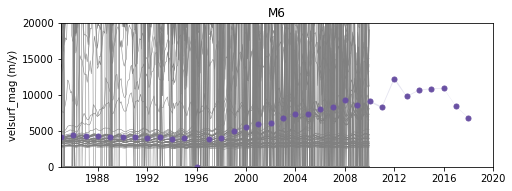

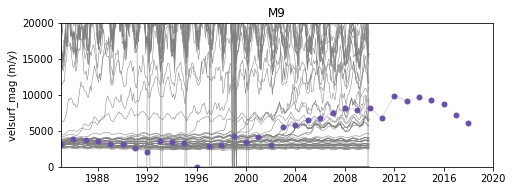

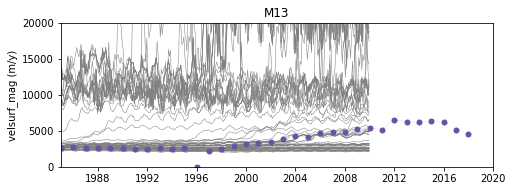

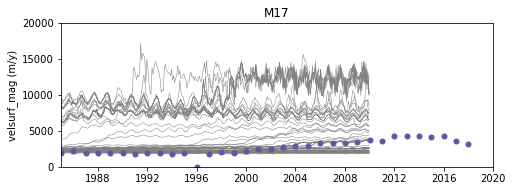

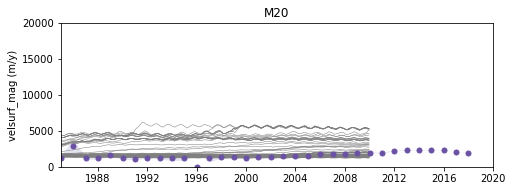

In [1]:
run ../util/plot_timeseries.py --obs_file ../data_sets/velocities/profiles/gps_stations_GRE_G0240_1985_2018.nc ../historical/2021_12_all/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_*_1980-1-1_2010-1-1.nc


The following simulation ids are missing:
   [11]
The following simulation ids are missing:
   [11]
  saving to jib_total_grounding_line_flux.pdf


/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


  saving to jib_vonmises_calving_rate.pdf


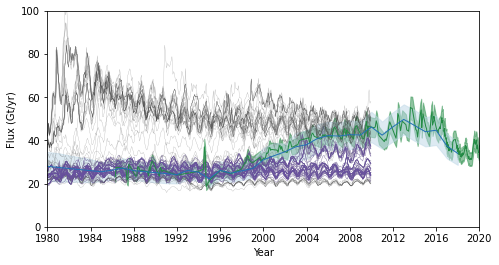

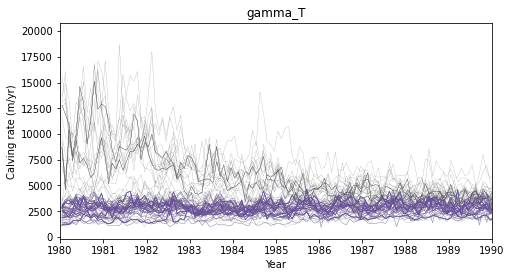

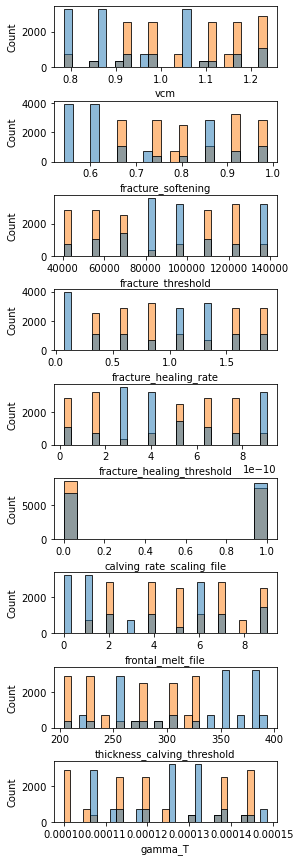

In [2]:
run ../util/analyze_csv.py --smoothing_length 1 

In [550]:
s_df = sum_df[sum_df["id"].isin(ids_pass)]

In [551]:
    validation_time = [pd.to_datetime("2004-1-1"), pd.to_datetime("2005-1-1")]
    m_df = s_df[s_df["time"].between(*validation_time)]
    m_df = s_df.groupby(by="id").mean().reset_index()
    all_ids = sum_df["id"].unique()
    d_val = d_mou[d_mou["time"].between(*validation_time)]
    discharge_range = np.array(
        [
            (d_val["Discharge (Gt/yr)"].max() - d_val["Discharge Error (Gt/yr)"].max()),
            (d_val["Discharge (Gt/yr)"].max() + d_val["Discharge Error (Gt/yr)"].max()),
        ]
    )
    discharge_range *= beta
    ids_pass = m_df[m_df[m_var].between(*discharge_range)]["id"]


In [552]:
ids_pass

Series([], Name: id, dtype: int64)

In [560]:
s_df[s_df["time"].between(*validation_time)]["total_grounding_line_flux (Gt year-1)"] 

4248     23.501158
4249     23.028336
4250     21.893843
4251     22.356964
4252     23.946018
           ...    
18295    29.732140
18296    30.024801
18297    30.211012
18298    29.727606
18299    28.626840
Name: total_grounding_line_flux (Gt year-1), Length: 372, dtype: float64

In [555]:
s_df

,id,vcm,fracture_softening,fracture_threshold,fracture_healing_rate,fracture_healing_threshold,calving_rate_scaling_file,frontal_melt_file,thickness_calving_threshold,gamma_T,...,thk (m),tillwat (m),topg (m),usurf (m),velbase_mag (m year-1),velsurf_mag (m year-1),vonmises_calving_rate (m year-1),vonmises_stress (Pascal),total_grounding_line_flux (Gt year-1),pass
3960,12,1.034668,0.79834,42041.015625,0.353516,7.824707e-10,0,5,279.0,0.000100,...,545893000.0,176501.62,-12764328.0,533193000.0,10190515.0,14348346.0,45638.630,1.684719e+10,23.549023,True
3961,12,1.034668,0.79834,42041.015625,0.353516,7.824707e-10,0,5,279.0,0.000100,...,545894850.0,176475.78,-12764328.0,533194660.0,10098357.0,14255306.0,34969.440,1.690309e+10,24.499432,True
3962,12,1.034668,0.79834,42041.015625,0.353516,7.824707e-10,0,5,279.0,0.000100,...,545896600.0,176447.33,-12764328.0,533195400.0,10251260.0,14407816.0,37705.530,1.686864e+10,24.528425,True
3963,12,1.034668,0.79834,42041.015625,0.353516,7.824707e-10,0,5,279.0,0.000100,...,545903000.0,176421.73,-12764328.0,533200200.0,10227200.0,14383427.0,35164.840,1.684505e+10,24.131315,True
3964,12,1.034668,0.79834,42041.015625,0.353516,7.824707e-10,0,5,279.0,0.000100,...,545904060.0,176393.58,-12764328.0,533200320.0,10420768.0,14577997.0,50115.445,1.676619e+10,24.920189,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,61,1.172363,0.98584,110791.015625,1.603516,6.587207e-10,1,9,304.0,0.000144,...,545616600.0,167257.14,-12764328.0,533027500.0,10117548.0,14342799.0,68140.500,1.681149e+10,29.139027,True
18356,61,1.172363,0.98584,110791.015625,1.603516,6.587207e-10,1,9,304.0,0.000144,...,545622800.0,167234.36,-12764328.0,533033820.0,10099391.0,14324022.0,46758.950,1.685159e+10,29.154455,True
18357,61,1.172363,0.98584,110791.015625,1.603516,6.587207e-10,1,9,304.0,0.000144,...,545625600.0,167210.10,-12764328.0,533034750.0,10135365.0,14359672.0,50103.633,1.684567e+10,28.716870,True
18358,61,1.172363,0.98584,110791.015625,1.603516,6.587207e-10,1,9,304.0,0.000144,...,545622100.0,167186.36,-12764328.0,533033060.0,9947311.0,14172045.0,50569.062,1.701608e+10,27.771387,True


In [7]:
mean_df[mean_df["fracture_threshold"] > 100000]["id"].unique()

array([14, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 69, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86])

In [8]:
from scipy.stats.distributions import uniform, randint, truncnorm, gamma


In [11]:
randint(1.25e-4, 1.5e-4).ppf([0 ,1])

array([-0.999875, -0.99985 ])